In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# set a grey background
sns.set(style="darkgrid")
sns.set_palette("tab10")
sns.set(rc={'figure.figsize':(5,3)})

#### Дано:    
Не правдивая, но с идентичной структурой выгрузка нескольких партнеров Betting Company по Affiliate.     
CPA сетки, внутри которых разные вебмастера. 

#### Задача:
1. Собрать статистику по 2м сеткам, чтобы сравнить качество одной и второй. 

2. Найти и провести оценку хороших вебов внутри сеток, плохих вебов и средних     
по данным игроков, которых они привели за период;

3. Сделать гипотезы, кого из вебмастеров отключить, а кого стоит оптимизировать и улучшить их качество.

## Оглавление:
* [0. Предварительная обработка данных](#first-bullet)
* [1. Собрать статистику по 2-ум сеткам, чтобы сравнить качество одной и второй.](#second-bullet)
* [2. Найти и провести оценку хороших вебов внутри сеток, плохих вебов и каких-то средних по данным игроков, которых они привели за период](#third-bullet)
* [3. Сделать гипотезы, кого из вебмастеров отключить,а кого стоит оптимизировать и улучшить их качество](#fourth-bullet)

#### <font color = blue> 0. Предварительная обработка данных <a class="anchor" id="first-bullet"></a>

In [3]:
df = pd.read_excel('test_import.xlsx')
df.head()

,Lead Id,Lead Status,Lead Identification Date,Lead Type,Date Baseline,Partner Id,Offer Id,Offer Product,Offer Action,Offer Pay System,...,Bets,Games Bets,Games Ggr,Games Turnover,Deposits Sum,Lead Marker,Ggr,Turnover,Sub 1,Sub 2
0,1082957.0,Rejected,2022-10-01,-,-,1401.0,98.0,Sport,Baseline,3800.0,...,4.0,0.0,0.0,0.0,0.000000,new,0.000000,0.000000,170828,4dbd11f763375c9078082493407308
1,1083387.0,Accepted,2022-10-01,-,2022-10-01,1401.0,98.0,Sport,Baseline,3800.0,...,2.0,0.0,0.0,0.0,2222.222222,"BH,trader bot",-22.222222,466.666667,213582,4f6410f76337adf5b767f250568583
2,1083570.0,Rejected,2022-10-01,-,-,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,0.0,0.0,0.0,0.000000,new,0.000000,0.000000,170828,4dbd11f76337c6bd5de7f630659770
3,1085628.0,Rejected,2022-10-01,-,-,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,0.0,0.0,0.0,0.000000,new,0.000000,0.000000,170828,4dbd11f76338350d2e52f514426298
4,1085727.0,Rejected,2022-10-01,-,-,54.0,98.0,Sport,Baseline,3800.0,...,0.0,0.0,0.0,0.0,0.000000,new,0.000000,0.000000,6338387765c82c0001f44319,8921


In [4]:
df.shape

(2999, 24)

In [5]:
df.isna().sum()

Lead Id                     1
Lead Status                 1
Lead Identification Date    1
Lead Type                   1
Date Baseline               1
Partner Id                  1
Offer Id                    1
Offer Product               1
Offer Action                1
Offer Pay System            1
Client Reg Date             1
Client Id                   1
Client Ftd Date             1
Deposits Count              1
Bets                        1
Games Bets                  1
Games Ggr                   1
Games Turnover              1
Deposits Sum                1
Lead Marker                 1
Ggr                         0
Turnover                    0
Sub 1                       1
Sub 2                       1
dtype: int64

Стоблцы:    

    'Lead Id' -  номер лида, 
    'Lead Status' - статус лида (accepted - лид прошел условия оффера, rejected - не прошел, wating - в ожидании),
    'Lead Type' - тип лида, проставляет антифрод (Bad, Good, -),
    'Lead Marker' - метка лида, 
    'Partner Id' - номер сетки,
    'Offer Id' -  номер договора,
    'Offer Name'- название договора,
    'Offer Product', 'Offer Action', 'Offer Pay System' - информация по договору, 
    'Client Id' - номер клиента, 
    'Lead Identification Date' - дата идентификации,
    'Client Reg Date' - дата регистрации лида в клиента,
    'Client Ftd Date' - дата первого депозита,
    'Date Baseline' - дата когда игрок прошел минимальный порог по сумме фтд для данного оффера,
    'Bets'- число ставок на спорт, 
    'Games Bets' - число игровых ставок,
    'Games Ggr' -  Gross Gaming Revenue - сумма всех ставок  минус сумма всех выигрышей на игры,
    'Ggr' -  Gross Gaming Revenue - сумма всех ставок  минус сумма всех выигрышей на спорт,
    'Games Turnover'- оборачиваемость средств через ставки на игры, 
    'Turnover' - оборачиваемость средств через ставки на спорт,
    'Deposits Count' - число депозитов,
    'Deposits Sum' - размер депозитов клиента, 
    'Sub 1', 'Sub 2' - один партнер в поле sub1 передает параметр веб-мастер id, а в sub2 - click id,второй партнер делает наоборот


In [6]:
df = df.dropna()
df.shape

(2998, 24)

Всего одна строка содержала nan значения, ее и удалила.

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Lead Id                     float64
Lead Status                  object
Lead Identification Date     object
Lead Type                    object
Date Baseline                object
Partner Id                  float64
Offer Id                    float64
Offer Product                object
Offer Action                 object
Offer Pay System            float64
Client Reg Date              object
Client Id                   float64
Client Ftd Date              object
Deposits Count               object
Bets                        float64
Games Bets                  float64
Games Ggr                   float64
Games Turnover              float64
Deposits Sum                float64
Lead Marker                  object
Ggr                         float64
Turnover                    float64
Sub 1                        object
Sub 2                        object
dtype: object

Преобразую данные в таблице

In [9]:
#replace spaces with _
df.columns = df.columns.str.replace(' ', '_')
#перевожу даты в тип datetime
df['Lead_Identification_Date'] = pd.to_datetime(df['Lead_Identification_Date'], format='%Y-%m-%d', errors='coerce')
df['Date_Baseline'] = pd.to_datetime(df['Date_Baseline'], format='%Y-%m-%d', errors='coerce')
df['Client_Reg_Date'] = pd.to_datetime(df['Client_Reg_Date'], format='%Y-%m-%d', errors='coerce')
df['Client_Ftd_Date'] = pd.to_datetime(df['Client_Ftd_Date'], format='%Y-%m-%d', errors='coerce')
#меняю тип числа депозитов Deposits_Count в числовой
df['Deposits_Count'] = pd.to_numeric(df['Deposits_Count'], errors='coerce')
df.dtypes #проверка

Lead_Id                            float64
Lead_Status                         object
Lead_Identification_Date    datetime64[ns]
Lead_Type                           object
Date_Baseline               datetime64[ns]
Partner_Id                         float64
Offer_Id                           float64
Offer_Product                       object
Offer_Action                        object
Offer_Pay_System                   float64
Client_Reg_Date             datetime64[ns]
Client_Id                          float64
Client_Ftd_Date             datetime64[ns]
Deposits_Count                     float64
Bets                               float64
Games_Bets                         float64
Games_Ggr                          float64
Games_Turnover                     float64
Deposits_Sum                       float64
Lead_Marker                         object
Ggr                                float64
Turnover                           float64
Sub_1                               object
Sub_2      

<font color = green> Cоздаю новые столбцы веб мастеров и clickid вместо спутанных Sub_1, Sub2

In [10]:
df.loc[:, 'Click_Id'] = np.where(df['Sub_1'].str.len() > df['Sub_2'].str.len(), df['Sub_1'], df['Sub_2'])
df.loc[:, 'Web_Id'] = np.where(df['Sub_1'].str.len() < df['Sub_2'].str.len(), df['Sub_1'], df['Sub_2'])
#удаляю Sub_1, Sub_2
df = df.drop(columns=['Sub_1', 'Sub_2'])
#уникальны ли Lead_Id ?
df.Lead_Id.count() == df.Lead_Id.nunique()

True

In [11]:
df.Lead_Type.unique()

array(['-', 'BAD', 'GOOD'], dtype=object)

In [12]:
df.Lead_Status.unique()

array(['Rejected', 'Accepted', 'Waiting'], dtype=object)

In [13]:
df.Lead_Marker.unique()

array(['new', 'BH,trader bot', 'trader bot', 'BH,trader bot,SCOR',
       'Standart', 'BH', 'BH,SCOR', 'BH,Cut SM,SCOR',
       'BH,Suspicios to 0,SCOR', 'Arb cut', 'BH,Suspicios to 0', 'Bot',
       'BH,Bot,trader bot,SCOR', 'BH,Bot,trader bot',
       'BH,Fixed Danger,Suspicios to 0(-Football 3-Football 2-Volleyball 2-Volleyball Low-)',
       'BH,Arb cut', 'BH,Arb cut,SCOR',
       'BH,Cut SM(-N/A-),Suspicios to 0(-statistics football-Hockey statistics-),SCOR',
       'BH,Suspicios to 0(-statistics football-),SCOR', 'Bot,trader bot',
       'BH,Cut SM(-everything except the top matches-statistics football-),SCOR',
       'BH,Cut SM', 'PRIOR3', 'After goal to 0',
       'Suspicios to 0(-Cyberfootball all-)', 'BH,SCOR,PRIOR3', 'SCOR',
       'Suspicios to 0(-bandy main-)', 'Suspicios to 0', 'Fixed cut',
       'Cut SM'], dtype=object)

<font color = green>Cразу помечаю ботов типом bad, 'Lead_Type' = 'BAD'

In [14]:
df.loc[df['Lead_Marker'].str.contains('bot', case=False), 'Lead_Type'] = 'BAD'

In [15]:
#создаю столбцы по сумме кол-ва ставок и суммарному GGR одного лида
df['Total_Bets'] = df['Bets'] + df['Games_Bets']
df['Total_Ggr'] = df['Ggr'] + df['Games_Ggr']

#средний размер депозита одного лида
df['Avg_Deposit'] = df['Deposits_Sum'] / df['Deposits_Count']
df['Avg_Deposit']
df.head()

,Lead_Id,Lead_Status,Lead_Identification_Date,Lead_Type,Date_Baseline,Partner_Id,Offer_Id,Offer_Product,Offer_Action,Offer_Pay_System,...,Games_Turnover,Deposits_Sum,Lead_Marker,Ggr,Turnover,Click_Id,Web_Id,Total_Bets,Total_Ggr,Avg_Deposit
0,1082957.0,Rejected,2022-10-01,-,NaT,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,0.000000,new,0.000000,0.000000,4dbd11f763375c9078082493407308,170828,4.0,0.000000,NaN
1,1083387.0,Accepted,2022-10-01,BAD,2022-10-01,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,2222.222222,"BH,trader bot",-22.222222,466.666667,4f6410f76337adf5b767f250568583,213582,2.0,-22.222222,2222.222222
2,1083570.0,Rejected,2022-10-01,-,NaT,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,0.000000,new,0.000000,0.000000,4dbd11f76337c6bd5de7f630659770,170828,0.0,0.000000,NaN
3,1085628.0,Rejected,2022-10-01,-,NaT,1401.0,98.0,Sport,Baseline,3800.0,...,0.0,0.000000,new,0.000000,0.000000,4dbd11f76338350d2e52f514426298,170828,0.0,0.000000,NaN
4,1085727.0,Rejected,2022-10-01,-,NaT,54.0,98.0,Sport,Baseline,3800.0,...,0.0,0.000000,new,0.000000,0.000000,6338387765c82c0001f44319,8921,0.0,0.000000,NaN


Время, за которое лиды проходят от идентификаци до регистрации (days_to_Reg):

In [16]:
df['days_to_Reg'] = (df['Client_Reg_Date'] - df['Lead_Identification_Date']).dt.days

Время, за которое лиды проходят от идентификаци до первого взноса (days_to_Ftd):

In [17]:
df['days_to_Ftd'] = (df['Client_Ftd_Date'] - df['Lead_Identification_Date']).dt.days

<font color = blue>**1. Собрать статистику по 2-ум сеткам, чтобы сравнить качество одной и второй.** <a class="anchor" id="second-bullet"></a>   

### Рассматриваемые метрики:    
Предполагаю, что боты, Bad и Rejected лиды нам однозначно не нравятся,     
поэтому их данные не учитываю при всех расчетах за исключением подсчета общего кол-ва пришедших лидов.

То есть 2-10 только для **NOT Bad, и NOT Rejected** юзеров*

    1. Общее число лидов,
    2. Конверсия, как процент зарегестрировавшихся лидов - СR_Reg (Conversion Rate to Reg), абсолютная,  
    3. Конверсия, как процент NOT Bad, и NOT Rejected лидов, внесших First Deposite, от всех пришедших 
        - CR_Ftd (Conversion Rate to First Deposite), абсолютная.
    4. Среднее число всех ставок на клиента(Avg_Number_of_Bets),   
    5. Суммарная выручка от всех ставок клиентов - Total_GGR (Gross Gaming Revenue),    
    6. Суммарный оборот - Total_Turnover,    
    7. Суммарный размер депозитов - Total_Deposit,
    8. Процент клиентов, сделавших последующие депозиты после первого - Retention_Rate,   

    9. Среднее время перехода лидов от идентификации до внесения депозита - days_to_Ftd (Conversion window to First Deposite),
    11. Процент BAD от всех лидов,
    12.Процент Rejected от всех лидов.

In [18]:
df.columns

Index(['Lead_Id', 'Lead_Status', 'Lead_Identification_Date', 'Lead_Type',
       'Date_Baseline', 'Partner_Id', 'Offer_Id', 'Offer_Product',
       'Offer_Action', 'Offer_Pay_System', 'Client_Reg_Date', 'Client_Id',
       'Client_Ftd_Date', 'Deposits_Count', 'Bets', 'Games_Bets', 'Games_Ggr',
       'Games_Turnover', 'Deposits_Sum', 'Lead_Marker', 'Ggr', 'Turnover',
       'Click_Id', 'Web_Id', 'Total_Bets', 'Total_Ggr', 'Avg_Deposit',
       'days_to_Reg', 'days_to_Ftd'],
      dtype='object')

In [19]:
#есть 2 типа сеток:
df['Partner_Id'].unique()

array([1401.,   54.])

Так как нужно оценить как кажество сеток, так и качество лидов внутри них,    
сначала рассчитываю все показатели для группировки и по вебам, и по сеткам.    
Затем, те, которые корректно, группирую.

In [20]:
#нахожу общее число лидов по вебам
all_leads = df.groupby(['Partner_Id','Web_Id'], as_index = False) \
    .agg({'Lead_Id':'count'}) \
    .rename(columns={'Lead_Id':'Number_of_Leads'})
all_leads.head(3)

,Partner_Id,Web_Id,Number_of_Leads
0,54.0,11543,30
1,54.0,1368,16
2,54.0,15194,33


In [21]:
#нахожу общее число лидов по сеткам
all_leads_partners= all_leads.groupby(['Partner_Id'], as_index = False) \
    .agg({'Number_of_Leads':'sum'})
all_leads_partners

,Partner_Id,Number_of_Leads
0,54.0,1244
1,1401.0,1754


In [22]:
#число NOT Bad, и NOT Rejected лидов, внесших первый депозит, по вебам
ok = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD" & Client_Ftd_Date!="NaT"& Deposits_Sum!=0') \
    .groupby(['Partner_Id','Web_Id'], as_index = False) \
    .agg({'Lead_Id':'count'}) \
    .rename(columns={'Lead_Id':'Number_of_Ftd'})   
ok.head(3)

,Partner_Id,Web_Id,Number_of_Ftd
0,54.0,11543,9
1,54.0,1368,4
2,54.0,15194,20


In [23]:
#число NOT Bad, и NOT Rejected лидов, внесших первый депозит, по сеткам
ok_partners = ok.groupby(['Partner_Id'], as_index = False) \
    .agg({'Number_of_Ftd':'sum'})
ok_partners

,Partner_Id,Number_of_Ftd
0,54.0,468
1,1401.0,586


In [24]:
#конверсия всех идентифицированных лидов в NOT Bad, и NOT Rejected клиентов, внесших первый депозит, по вебам
conversion = pd.merge(all_leads[['Partner_Id','Web_Id','Number_of_Leads']],
                       ok[['Web_Id','Number_of_Ftd']], 
                       on ='Web_Id')
conversion['CR_Ftd'] = 100 * conversion['Number_of_Ftd'] / conversion['Number_of_Leads']
conversion.head(3)

,Partner_Id,Web_Id,Number_of_Leads,Number_of_Ftd,CR_Ftd
0,54.0,11543,30,9,30.000000
1,54.0,1368,16,4,25.000000
2,54.0,15194,33,20,60.606061


In [25]:
#конверсия всех идентифицированных лидов в NOT Bad, и NOT Rejected клиентов, внесших первый депозит, по сеткам
conversion_partners = pd.merge(all_leads_partners,
                       ok_partners, 
                       on ='Partner_Id')
conversion_partners['CR_Ftd'] = 100 * conversion_partners['Number_of_Ftd'] / conversion_partners['Number_of_Leads']
conversion_partners

,Partner_Id,Number_of_Leads,Number_of_Ftd,CR_Ftd
0,54.0,1244,468,37.620579
1,1401.0,1754,586,33.409350


In [26]:
#число NOT Bad, и NOT Rejected лидов, кто сделал первый депозит, по вебам
ftd = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD" & Client_Ftd_Date!="NaT" & Deposits_Sum!=0') \
    .groupby(['Partner_Id','Web_Id'], as_index = False) \
    .agg({'Lead_Id':'count'}) \
    .rename(columns={'Lead_Id':'Number_of_Ftd_Leads'})   
ftd.head(2)

,Partner_Id,Web_Id,Number_of_Ftd_Leads
0,54.0,11543,9
1,54.0,1368,4


In [27]:
#число NOT Bad, и NOT Rejected лидов, кто сделал первый депозит, по сеткам
ftd_partners = ftd.groupby(['Partner_Id'], as_index = False) \
    .agg({'Number_of_Ftd_Leads':'sum'})
ftd_partners

,Partner_Id,Number_of_Ftd_Leads
0,54.0,468
1,1401.0,586


In [28]:
#число NOT Bad, и NOT Rejected лидов, кто сделал больше одного депозита (повторные), по вебам
repeat = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD" & Deposits_Count>1 & Deposits_Sum>0') \
    .groupby(['Partner_Id','Web_Id'], as_index = False) \
    .agg({'Lead_Id':'count'}) \
    .rename(columns={'Lead_Id':'Number_of_Rem_Leads'})#Remained   
repeat.head(3)

,Partner_Id,Web_Id,Number_of_Rem_Leads
0,54.0,11543,5
1,54.0,1368,3
2,54.0,15194,13


In [29]:
#число NOT Bad, и NOT Rejected лидов, кто сделал больше одного депозита (повторные), по сеткам
repeat_partners =  repeat.groupby(['Partner_Id'], as_index = False) \
    .agg({'Number_of_Rem_Leads':'sum'})
repeat_partners

,Partner_Id,Number_of_Rem_Leads
0,54.0,250
1,1401.0,344


In [30]:
#Retention_Rate по вебам
retention = pd.merge(conversion[['Partner_Id','Web_Id','Number_of_Ftd']],
                       repeat[['Web_Id','Number_of_Rem_Leads']], 
                       on ='Web_Id')
retention['Retention_Rate'] = 100 * retention['Number_of_Rem_Leads'] / retention['Number_of_Ftd']
retention.head(3)

,Partner_Id,Web_Id,Number_of_Ftd,Number_of_Rem_Leads,Retention_Rate
0,54.0,11543,9,5,55.555556
1,54.0,1368,4,3,75.000000
2,54.0,15194,20,13,65.000000


In [31]:
#Retention_Rate по сеткам
retention_partners = pd.merge(conversion_partners[['Partner_Id','Number_of_Ftd']],
                       repeat_partners[['Partner_Id','Number_of_Rem_Leads']], 
                       on ='Partner_Id')
retention_partners['Retention_Rate'] = 100 * retention_partners['Number_of_Rem_Leads'] / retention_partners['Number_of_Ftd']
retention_partners

,Partner_Id,Number_of_Ftd,Number_of_Rem_Leads,Retention_Rate
0,54.0,468,250,53.418803
1,1401.0,586,344,58.703072


In [32]:
#число NOT Bad, и NOT Rejected лидов, кто зарегестрировался
reg = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD" & Client_Reg_Date!="NaT"') \
    .groupby(['Partner_Id','Web_Id'], as_index = False) \
    .agg({'Lead_Id':'count'}) \
    .rename(columns={'Lead_Id':'Number_of_Reg_Leads'})   
reg.head(3)

,Partner_Id,Web_Id,Number_of_Reg_Leads
0,54.0,11543,17
1,54.0,1368,8
2,54.0,15194,26


In [33]:
#СR_Reg (Conversion Rate to Reg) по вебам
cr_reg = pd.merge(all_leads[['Partner_Id','Web_Id','Number_of_Leads']],
                       reg[['Web_Id','Number_of_Reg_Leads']], 
                       on ='Web_Id')
cr_reg['СR_Reg'] = 100 * cr_reg['Number_of_Reg_Leads'] / cr_reg['Number_of_Leads']
cr_reg.head(2)

,Partner_Id,Web_Id,Number_of_Leads,Number_of_Reg_Leads,СR_Reg
0,54.0,11543,30,17,56.666667
1,54.0,1368,16,8,50.000000


In [34]:
#СR_Reg (Conversion Rate to Reg) по сеткам
cr_reg_partners = cr_reg.groupby(['Partner_Id'], as_index = False) \
                        .agg({'Number_of_Leads':'sum',
                              'Number_of_Reg_Leads':'sum'})
cr_reg_partners['СR_Reg'] = 100 * cr_reg_partners['Number_of_Reg_Leads'] / cr_reg_partners['Number_of_Leads']
cr_reg_partners

,Partner_Id,Number_of_Leads,Number_of_Reg_Leads,СR_Reg
0,54.0,1231,1127,91.551584
1,1401.0,1750,1195,68.285714


Для оценки качества вебов и сеток не так важно, какие именно ставки внутри делали клиенты, поэтому данные по спорту и играм суммирую:

In [35]:
#добавляю в df суммарное число ставок, Turnover и суммарный GGR по спортивным и игровым ставкам вместе
df['Total_Ggr'] = df['Ggr'] + df['Games_Ggr']
df['Total_Bets'] = df['Bets'] + df['Games_Bets']
df['Total_Turnover'] = df['Turnover'] + df['Games_Turnover']

In [36]:
#группирую по сеткам и вебам для NOT Bad, и NOT Rejected юзеров
#средние метрики, суммарные деньги
full_ok = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD"') \
            .groupby(['Partner_Id','Web_Id'], as_index = False) \
            .agg({'Total_Ggr':'sum',
                  'Total_Turnover':'sum',
                  'Deposits_Sum':'sum',
                  'days_to_Ftd':'mean'
                 }) \
            .rename(columns={'Deposits_Sum':'Total_Deposit',
                  'days_to_Ftd':'Avg_days_to_Ftd'
                 })
full_ok.head(3)

,Partner_Id,Web_Id,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd
0,54.0,11543,67488.444444,586592.444444,1.434109e+06,11.222222
1,54.0,1368,10433.555556,113215.555556,3.112022e+05,0.500000
2,54.0,15194,2196.555556,121553.777778,3.482156e+05,2.052632


In [37]:
#Betting Frequency - Avg_Number_of_Bets,
avg_ok = df.query('Lead_Status!="Rejected" & Lead_Type!="BAD"') \
           .groupby(['Partner_Id','Web_Id'], as_index = False) \
           .agg({'Avg_Deposit':'mean',
                 'Total_Bets':'mean'}) \
           .rename(columns={'Avg_Deposit':'Avg_Deposit_Size',
                            'Total_Bets':'Avg_Number_of_Bets'})
avg_ok.head(3)

,Partner_Id,Web_Id,Avg_Deposit_Size,Avg_Number_of_Bets
0,54.0,11543,5558.121399,38.294118
1,54.0,1368,2106.354401,173.875000
2,54.0,15194,1027.061997,66.076923


In [38]:
#группирую по статусу лидов, считая кол-во лидов каждого статуса от каждого веба
df_groupped_status = df.groupby(['Partner_Id','Web_Id','Lead_Status'], as_index = False) \
                       .agg({'Lead_Id':'count'}) \
                       .rename(columns={'Lead_Id':'Num_Of_Leads'})
df_groupped_status.head(3)

,Partner_Id,Web_Id,Lead_Status,Num_Of_Leads
0,54.0,11543,Accepted,8
1,54.0,11543,Rejected,13
2,54.0,11543,Waiting,9


In [39]:
#перевожу в сводную талбицу
df_Lead_Status = df_groupped_status.pivot(index = ['Partner_Id','Web_Id'],
                                          columns = 'Lead_Status',
                                          values ='Num_Of_Leads').fillna(0)
#создаю колонку процент Rejected Lead_Status по вебам
df_Lead_Status['Rejected_Percent'] = 100 * df_Lead_Status.Rejected / (df_Lead_Status.Accepted + 
                                                                      df_Lead_Status.Rejected + 
                                                                      df_Lead_Status.Waiting)
df_Lead_Status=df_Lead_Status.reset_index()
df_Lead_Status.head(3)

Lead_Status,Partner_Id,Web_Id,Accepted,Rejected,Waiting,Rejected_Percent
0,54.0,11543,8.0,13.0,9.0,43.333333
1,54.0,1368,5.0,7.0,4.0,43.750000
2,54.0,15194,19.0,6.0,8.0,18.181818


In [40]:
#создаю колонку процент Rejected Lead_Status от всех по сеткам 
df_Lead_Status_partners = df_Lead_Status.groupby(['Partner_Id'], as_index = False) \
                                        .agg({'Accepted':'sum',
                                              'Rejected':'sum',
                                              'Waiting':'sum'})
df_Lead_Status_partners['Rejected_Percent'] = 100 * df_Lead_Status_partners.Rejected / (df_Lead_Status_partners.Accepted + 
                                                                                        df_Lead_Status_partners.Rejected + 
                                                                                        df_Lead_Status_partners.Waiting)
df_Lead_Status_partners

Lead_Status,Partner_Id,Accepted,Rejected,Waiting,Rejected_Percent
0,54.0,434.0,73.0,737.0,5.868167
1,1401.0,714.0,329.0,711.0,18.757127


In [41]:
#аналогично группирую по типу лидов, считая кол-во лидов каждого типа от каждого веба
df_groupped_type = df.groupby(['Partner_Id','Web_Id','Lead_Type'], as_index = False) \
                     .agg({'Lead_Id':'count'}) \
                     .rename(columns={'Lead_Id':'Num_Of_Leads'})
df_groupped_type.head(3)

,Partner_Id,Web_Id,Lead_Type,Num_Of_Leads
0,54.0,11543,-,29
1,54.0,11543,GOOD,1
2,54.0,1368,-,14


In [42]:
df_Lead_Type = df_groupped_type.pivot(index = ['Partner_Id','Web_Id'], columns = 'Lead_Type', values ='Num_Of_Leads') \
                               .fillna(0).reset_index()
df_Lead_Type = df_Lead_Type.rename(columns={'-':'unknown'})
df_Lead_Type.head(3)

Lead_Type,Partner_Id,Web_Id,unknown,BAD,GOOD
0,54.0,11543,29.0,0.0,1.0
1,54.0,1368,14.0,1.0,1.0
2,54.0,15194,29.0,1.0,3.0


In [43]:
#аналогично нахожу процент BAD Lead_Type
df_Lead_Type['Number_of_Leads'] = df_Lead_Type[['unknown', 'GOOD', 'BAD']].fillna(0).sum(axis=1)
df_Lead_Type['Bad_Percent'] = 100 * df_Lead_Type.BAD / df_Lead_Type.Number_of_Leads

df_Lead_Type.head(3)

Lead_Type,Partner_Id,Web_Id,unknown,BAD,GOOD,Number_of_Leads,Bad_Percent
0,54.0,11543,29.0,0.0,1.0,30.0,0.000000
1,54.0,1368,14.0,1.0,1.0,16.0,6.250000
2,54.0,15194,29.0,1.0,3.0,33.0,3.030303


In [44]:
#BAD % по сеткам
df_Lead_Type_partners = df_Lead_Type.groupby(['Partner_Id'], as_index = False) \
                                    .agg({'unknown':'sum',
                                          'GOOD':'sum',
                                          'BAD':'sum',
                                          'Number_of_Leads': 'sum'})
df_Lead_Type_partners['Bad_Percent'] = 100 * df_Lead_Type_partners.BAD / df_Lead_Type_partners.Number_of_Leads
df_Lead_Type_partners

Lead_Type,Partner_Id,unknown,GOOD,BAD,Number_of_Leads,Bad_Percent
0,54.0,1028.0,172.0,44.0,1244.0,3.536977
1,1401.0,1408.0,116.0,230.0,1754.0,13.112885


### Все метрики по вебам (full_web)

In [45]:
#Объединяю общий датафрейм со всеми искомыми метриками
one_two = pd.merge(conversion[['Partner_Id', 'Web_Id', 'CR_Ftd']],
                       avg_ok[['Web_Id', 'Avg_Number_of_Bets', 'Avg_Deposit_Size']],
                       on ='Web_Id')
one_five = pd.merge(one_two,
                       full_ok[['Web_Id', 'Total_Ggr', 'Total_Turnover', 
                                'Total_Deposit', 'Avg_days_to_Ftd']], 
                       on ='Web_Id')
one_six = pd.merge(one_five,
                       retention[['Web_Id', 'Retention_Rate']],
                       on ='Web_Id')
one_seven = pd.merge(one_six,
                       cr_reg[['Web_Id', 'СR_Reg']],
                       on ='Web_Id') 
one_nine = pd.merge(one_seven,
                       df_Lead_Type[['Web_Id', 'Bad_Percent', 'Number_of_Leads']],
                       on ='Web_Id') 
full_web = pd.merge(one_nine,
                       df_Lead_Status[['Web_Id', 'Rejected_Percent']],
                       on ='Web_Id') 
full_web['Average_Client_Value'] = full_web['CR_Ftd']*full_web['Total_Deposit'] / (100*full_web['Number_of_Leads'])
#Average_Client_Value - средняя внесенная на платформу сумма денег на одного платящего неплохого клиента 
full_web['Average_Ggr'] = full_web['Total_Ggr'] / full_web['Number_of_Leads']
full_web['Partner_Id'] = full_web['Partner_Id'].astype(int)
full_web.head()

,Partner_Id,Web_Id,CR_Ftd,Avg_Number_of_Bets,Avg_Deposit_Size,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd,Retention_Rate,СR_Reg,Bad_Percent,Number_of_Leads,Rejected_Percent,Average_Client_Value,Average_Ggr
0,54,11543,30.000000,38.294118,5558.121399,67488.444444,586592.444444,1.434109e+06,11.222222,55.555556,56.666667,0.000000,30.0,43.333333,14341.088889,2249.614815
1,54,1368,25.000000,173.875000,2106.354401,10433.555556,113215.555556,3.112022e+05,0.500000,75.000000,50.000000,6.250000,16.0,43.750000,4862.534722,652.097222
2,54,15194,60.606061,66.076923,1027.061997,2196.555556,121553.777778,3.482156e+05,2.052632,65.000000,78.787879,3.030303,33.0,18.181818,6395.143353,66.562290
3,54,16090,88.888889,26.000000,3085.910192,-1181.333333,34312.444444,1.697978e+05,1.000000,100.000000,88.888889,11.111111,9.0,0.000000,16770.150892,-131.259259
4,54,16272,85.714286,13.666667,2885.925926,1744.555556,5313.777778,2.711111e+04,0.000000,33.333333,85.714286,0.000000,7.0,14.285714,3319.727891,249.222222


#### При наличии одного приоритетного показателя можно сортировать таблицу выше (**full_web**), выделяя лучшие и худшие вебы.

### Все метрики по сеткам (full_partners)

In [46]:
#суммирую/усредняю данные по Partner_Id
full_web_partners  = full_web.groupby(['Partner_Id'], as_index = False) \
                             .agg({'Avg_Number_of_Bets':'mean',
                                   'Avg_Deposit_Size':'mean',
                                   'Total_Ggr':'sum',
                                   'Total_Turnover':'sum',
                                   'Total_Deposit':'sum',
                                   'Avg_days_to_Ftd':'mean',
                                   'Number_of_Leads':'sum'
                                  }) 

In [47]:
df_partners = pd.merge(full_web_partners,
                       conversion_partners[['Partner_Id','CR_Ftd']],
                       on ='Partner_Id') 
df_partners = pd.merge(df_partners,
                       retention_partners[['Partner_Id','Retention_Rate']],
                       on ='Partner_Id') 
df_partners = pd.merge(df_partners,
                       cr_reg_partners[['Partner_Id','СR_Reg']],
                       on ='Partner_Id') 
df_partners = pd.merge(df_partners,
                       df_Lead_Type_partners[['Partner_Id','Bad_Percent']],
                       on ='Partner_Id') 
full_partners = pd.merge(df_partners,
                       df_Lead_Status_partners[['Partner_Id','Rejected_Percent']],
                       on ='Partner_Id')
full_partners['Average_Client_Value'] = full_partners['CR_Ftd']*full_partners['Total_Deposit'] / (100*full_partners['Number_of_Leads'])
full_partners['Average_Ggr'] = full_partners['Total_Ggr'] / full_partners['Number_of_Leads']
full_partners 

,Partner_Id,Avg_Number_of_Bets,Avg_Deposit_Size,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd,Number_of_Leads,CR_Ftd,Retention_Rate,СR_Reg,Bad_Percent,Rejected_Percent,Average_Client_Value,Average_Ggr
0,54,55.509588,4563.227281,701620.666667,9.142221e+06,1.840660e+07,1.951370,1225.0,37.620579,53.418803,91.551584,3.536977,5.868167,5652.790026,572.751565
1,1401,58.493502,8401.428490,440135.000000,6.696446e+06,1.848872e+07,1.967628,1717.0,33.409350,58.703072,68.285714,13.112885,18.757127,3597.530402,256.339546


In [48]:
full_partners.columns

Index(['Partner_Id', 'Avg_Number_of_Bets', 'Avg_Deposit_Size', 'Total_Ggr',
       'Total_Turnover', 'Total_Deposit', 'Avg_days_to_Ftd', 'Number_of_Leads',
       'CR_Ftd', 'Retention_Rate', 'СR_Reg', 'Bad_Percent', 'Rejected_Percent',
       'Average_Client_Value', 'Average_Ggr'],
      dtype='object')

#### Главные метрики:     
 
        1. Total_Ggr - суммарная выручка от NOT Bad, NOT Rejected клиентов,
        2. CR_Ftd - процент NOT Bad, NOT Rejected лидов, внесших первый депозит,
        3. Retention_Rate - процент NOT Bad, NOT Rejected клиентов, принесших деньги повторно,
        4. Average_Client_Value	- средняя сумма депозита на NOT Bad, NOT Rejected платящего клиента,       
        5. Number_of_Leads -  число всех пришедших лидов.
        
#### Дополнительные метрики:

Финансовые:    
        
        6. Total_Turnover - суммарный оборот денег от NOT Bad, NOT Rejected клиентов.    
           Может быть большим, но нам важнее, чтобы большой была выручка.    
           Связан с числом ставок, то есть активностью клиентов.
        7. Total_Deposit - суммарный внесенный NOT Bad, NOT Rejected клиентами депозит.    \
           Может быть выражен из Average_Client_Value и числа клиентов.
        
Конверсия: 

        8. СR_Reg - конверсия лидов в NOT Bad, NOT Rejected зарегестрированных пользователей.     
           Учли более важный процент - лидов, внесших деньги.

Метрики объема:

        9. Average_Ggr - средняя выручка с одного клиента.    
           Выражается из Total_Ggr, конверсии и числа клиентов. 
        10.Avg_Deposit_Size - средний размер депозита NOT Bad, NOT Rejected клиента,
        11.Avg_Number_of_Bets - активность NOT Bad, NOT Rejected пользователей на платформе.    
           Влияет на Turnover, выражает в том числе вовлеченность клиентов.
        
Метрика удержания:

        12.Avg_days_to_Ftd - конверсионное окно - число дней от идентификации до регистрации,
        
Метрики качества лидов:

        13.Bad_Percent 
        14.Rejected_Percent - интересны для наглядности, но учтены в расчетах.

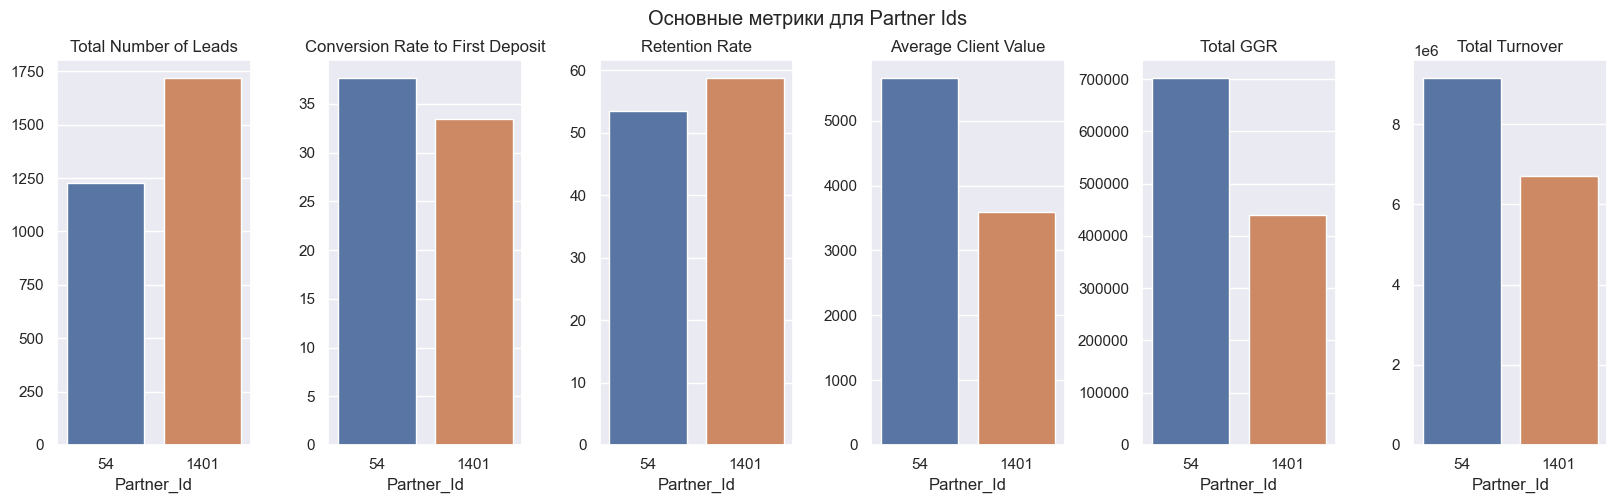

In [49]:
fig, axes = plt.subplots(1, 6, figsize=(20,5))
plt.suptitle("Основные метрики для Partner Ids") 
sns.barplot(data=full_partners, x="Partner_Id", y="Number_of_Leads", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_title("Total Number of Leads")

sns.barplot(data=full_partners, x="Partner_Id", y="Retention_Rate", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_title("Retention Rate")

sns.barplot(data=full_partners, x="Partner_Id", y="CR_Ftd", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_title("Conversion Rate to First Deposit")

sns.barplot(data=full_partners, x="Partner_Id", y="Total_Ggr", ax=axes[4])
axes[4].set_ylabel("")
axes[4].set_title("Total GGR")


sns.barplot(data=full_partners, x="Partner_Id", y="Average_Client_Value", ax=axes[3])
axes[3].set_ylabel("")
axes[3].set_title("Average Client Value")

sns.barplot(data=full_partners, x="Partner_Id", y="Total_Turnover", ax=axes[5])
axes[5].set_ylabel("")
axes[5].set_title("Total Turnover")

fig.subplots_adjust(wspace=0.4)
#барплоты расположены слева направо для визуализации потока конверсии: от лидов до итоговой выручки

### Выводы по анализу сеток:
Total Number of Leads - полное число лидов, пришедших от сетки. Для 1401 оно выше.     
Но важнее то, каково качество пришедших лидов и сколько они принесли денег компании.    
Conversion Rate to First Deposit - какой процент от всех лидов был признан Not Rejected, Not Bad и занес хотя бы первый депозит. Этот показатель для сетки 54 уже выше, чем для 1401.    
Retention Rate - процент клиентов, сделавших больше одного депозита. Для обоих сеток находится на уровне 50-60%.    
Average Client Value - средняя сумма денег, внесенная одним клиентом. Тоже выше для сетки 1401, что говорит о большей "ценности" клиентов этой сетки для нашей компании.    
И наконец, Total GGR - общая выручка от сетки, главная метрика. Видно, что для 1-ой сетки (№54) Total GGR значительно выше.    
Total Turnover также выше для сетки 54.
    
Таким образом, **хоть сетка 54 приводит и больше лидов, их "качество" хуже, и в денежном эквиваленте для компании более выгодно сотрудничество с сеткой 1401**.

 ####  <font color = blue> 2. Найти и провести оценку (как-то разделить) хороших вебов внутри сеток, плохих вебов и каких-то средних по данным игроков, которых они привели за период <a class="anchor" id="third-bullet"></a>

In [50]:
full_web['Partner_Id'] = full_web['Partner_Id'].astype(int)
full_web.head()

,Partner_Id,Web_Id,CR_Ftd,Avg_Number_of_Bets,Avg_Deposit_Size,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd,Retention_Rate,СR_Reg,Bad_Percent,Number_of_Leads,Rejected_Percent,Average_Client_Value,Average_Ggr
0,54,11543,30.000000,38.294118,5558.121399,67488.444444,586592.444444,1.434109e+06,11.222222,55.555556,56.666667,0.000000,30.0,43.333333,14341.088889,2249.614815
1,54,1368,25.000000,173.875000,2106.354401,10433.555556,113215.555556,3.112022e+05,0.500000,75.000000,50.000000,6.250000,16.0,43.750000,4862.534722,652.097222
2,54,15194,60.606061,66.076923,1027.061997,2196.555556,121553.777778,3.482156e+05,2.052632,65.000000,78.787879,3.030303,33.0,18.181818,6395.143353,66.562290
3,54,16090,88.888889,26.000000,3085.910192,-1181.333333,34312.444444,1.697978e+05,1.000000,100.000000,88.888889,11.111111,9.0,0.000000,16770.150892,-131.259259
4,54,16272,85.714286,13.666667,2885.925926,1744.555556,5313.777778,2.711111e+04,0.000000,33.333333,85.714286,0.000000,7.0,14.285714,3319.727891,249.222222


Веб считаем лучше, когда все нижеперечисленные метрики выше:     

        Number_of_Leads
        CR_Ftd 
        Retention_Rate
        Total_Ggr
        Average_Client_Value 
        Total Turnover

<AxesSubplot:xlabel='Number_of_Leads', ylabel='Count'>

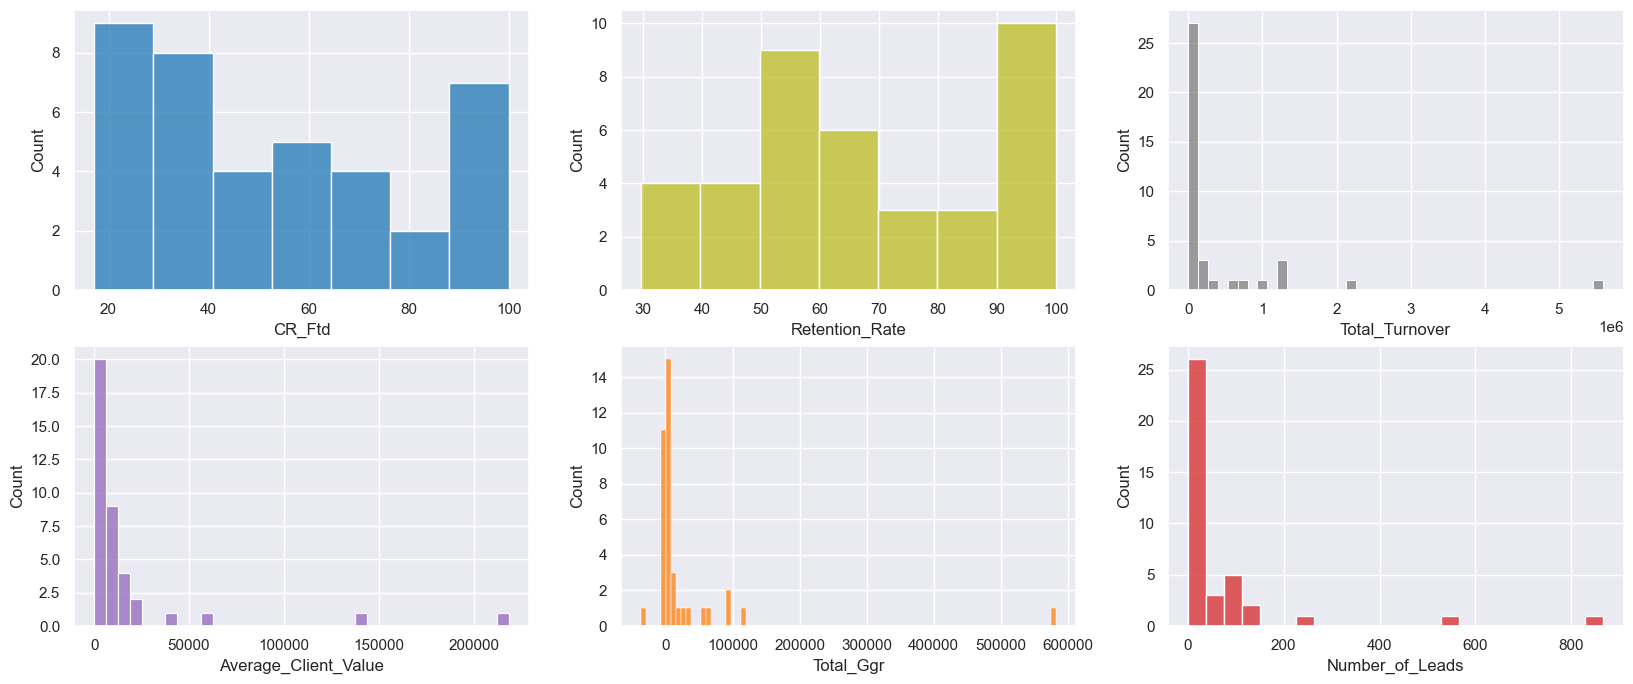

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

sns.histplot(data=full_web, x="CR_Ftd", kde=False, color="tab:blue", ax=axes[0,0])
sns.histplot(data=full_web, x="Retention_Rate", kde=False, color="tab:olive", ax=axes[0,1])
sns.histplot(data=full_web, x="Total_Turnover", kde=False, color="gray", ax=axes[0,2])
sns.histplot(data=full_web, x="Average_Client_Value", kde=False, color="tab:purple", ax=axes[1,0])
sns.histplot(data=full_web, x="Total_Ggr", kde=False, color="tab:orange", ax=axes[1,1])
sns.histplot(data=full_web, x="Number_of_Leads", kde=False, color="tab:red", ax=axes[1,2])

Каждому вебу нужно распределить баллы 1 до 5 по каждому параметру.
Воспользуемся методом квантилей. Видим, что значения некоторых метрик лежат в хвостах распределения. Не будем их учитывать при расчете квантилей.

In [52]:
quantiles = full_web[['CR_Ftd', 'Retention_Rate']].quantile([.2, .4, .6, .8]).to_dict()
quantiles['Total_Turnover'] = full_web.loc[full_web['Total_Turnover'] < 1e6, #обрезаю выбросы, чтобы не портить квантили
                                          'Total_Deposit'].quantile([.2, .4, .6, .8]).to_dict() 
quantiles['Average_Client_Value'] = full_web.loc[full_web['Average_Client_Value'] < 1e5,
                                                 'Average_Client_Value'].quantile([.2, .4, .6, .8]).to_dict()
quantiles['Total_Ggr'] = full_web.loc[full_web['Total_Ggr'] < 1e5, 'Total_Ggr'].quantile([.2, .4, .6, .8]).to_dict()
quantiles['Number_of_Leads'] = full_web.loc[full_web['Number_of_Leads'] < 200, 'Number_of_Leads'].quantile([.2, .4, .6, .8]).to_dict()

quantiles

{'CR_Ftd': {0.2: 26.10798650168729,
  0.4: 39.515151515151516,
  0.6: 55.35353535353536,
  0.8: 82.28571428571429},
 'Retention_Rate': {0.2: 48.88888888888889,
  0.4: 56.42857142857143,
  0.6: 70.51282051282051,
  0.8: 95.3846153846154},
 'Total_Turnover': {0.2: 25845.333333333336,
  0.4: 92876.00000000003,
  0.6: 209746.66666666666,
  0.8: 451753.3333333335},
 'Average_Client_Value': {0.2: 1243.1905143406505,
  0.4: 3127.7149575879735,
  0.6: 7955.464295014317,
  0.8: 12500.078728395061},
 'Total_Ggr': {0.2: -58.08888888888876,
  0.4: 2036.7555555555534,
  0.6: 5885.288888888887,
  0.8: 14949.266666666672},
 'Number_of_Leads': {0.2: 4.0, 0.4: 11.0, 0.6: 32.0, 0.8: 63.0}}

<font color = green> Функции для присвоения рангов:

In [53]:
def get_rank(x, col, quantiles):
    if x <= quantiles[col][.2]:
        return 1
    elif x <= quantiles[col][.4]:
        return 2
    elif x <= quantiles[col][.6]:
        return 3
    elif x <= quantiles[col][.8]:
        return 4
    else:
        return 5

In [54]:
for col in quantiles.keys():
    full_web[col + '_rank'] = full_web[col].apply(lambda x: get_rank(x, col, quantiles))
full_web.head()

,Partner_Id,Web_Id,CR_Ftd,Avg_Number_of_Bets,Avg_Deposit_Size,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd,Retention_Rate,...,Number_of_Leads,Rejected_Percent,Average_Client_Value,Average_Ggr,CR_Ftd_rank,Retention_Rate_rank,Total_Turnover_rank,Average_Client_Value_rank,Total_Ggr_rank,Number_of_Leads_rank
0,54,11543,30.000000,38.294118,5558.121399,67488.444444,586592.444444,1.434109e+06,11.222222,55.555556,...,30.0,43.333333,14341.088889,2249.614815,2,2,5,5,5,3
1,54,1368,25.000000,173.875000,2106.354401,10433.555556,113215.555556,3.112022e+05,0.500000,75.000000,...,16.0,43.750000,4862.534722,652.097222,1,4,3,3,4,3
2,54,15194,60.606061,66.076923,1027.061997,2196.555556,121553.777778,3.482156e+05,2.052632,65.000000,...,33.0,18.181818,6395.143353,66.562290,4,3,3,3,3,4
3,54,16090,88.888889,26.000000,3085.910192,-1181.333333,34312.444444,1.697978e+05,1.000000,100.000000,...,9.0,0.000000,16770.150892,-131.259259,5,5,2,5,1,2
4,54,16272,85.714286,13.666667,2885.925926,1744.555556,5313.777778,2.711111e+04,0.000000,33.333333,...,7.0,14.285714,3319.727891,249.222222,5,1,1,3,2,2


Построим новые гистограммы по рангам

<AxesSubplot:xlabel='Number_of_Leads_rank', ylabel='Count'>

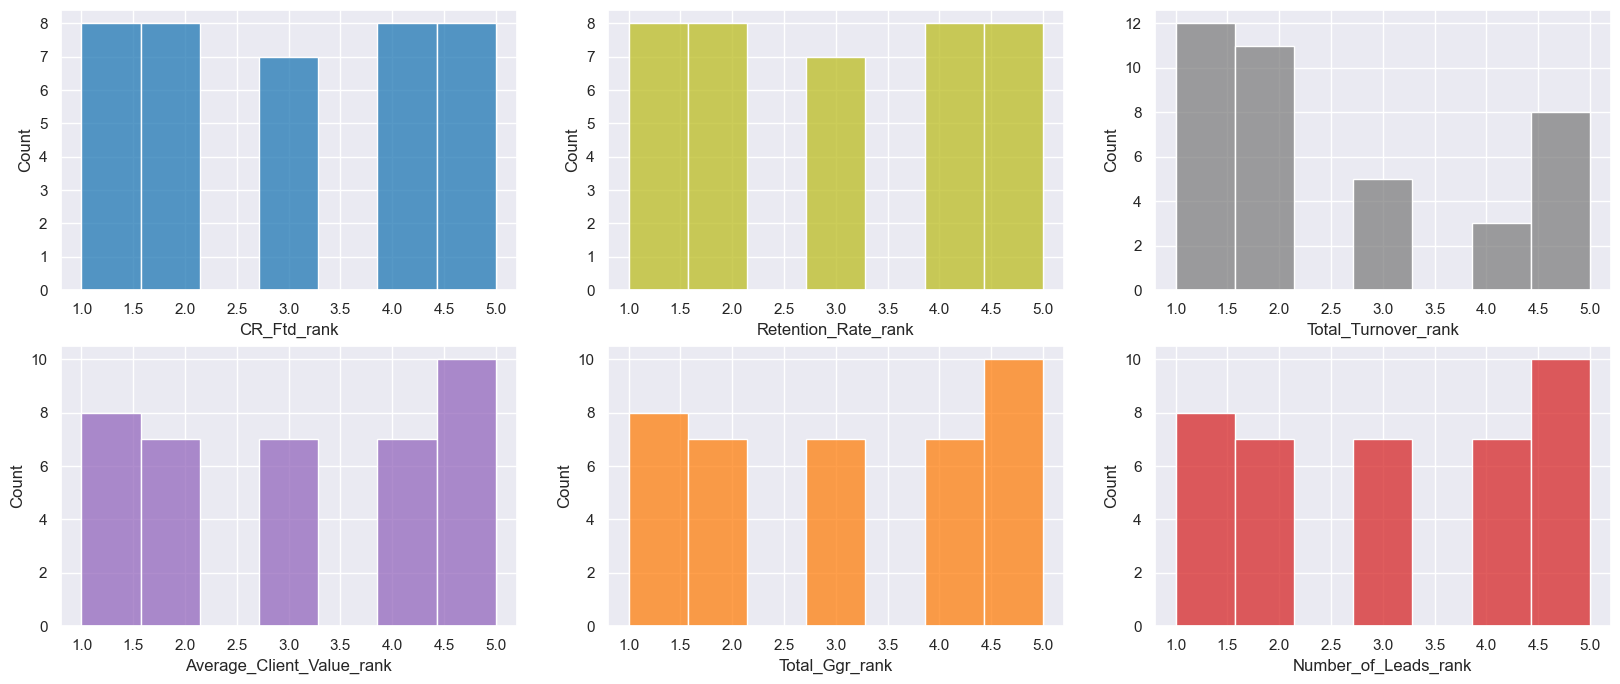

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

sns.histplot(data=full_web, x="CR_Ftd_rank", kde=False, color="tab:blue", ax=axes[0,0])
sns.histplot(data=full_web, x="Retention_Rate_rank", kde=False, color="tab:olive", ax=axes[0,1])
sns.histplot(data=full_web, x="Total_Turnover_rank", kde=False, color="gray", ax=axes[0,2])
sns.histplot(data=full_web, x="Average_Client_Value_rank", kde=False, color="tab:purple", ax=axes[1,0])
sns.histplot(data=full_web, x="Total_Ggr_rank", kde=False, color="tab:orange", ax=axes[1,1])
sns.histplot(data=full_web, x="Number_of_Leads_rank", kde=False, color="tab:red", ax=axes[1,2])

Предлагается исключить из рассмотрения метрики "Total_Turnover".    
Буду считать **"хорошими" вебами** тех, у кого по всем местрикам ранг выше 2.     
**Средними**, у кого ранг выше 2, за исключением двух метрик. Также их будем считать теми, кому следует подтянуть вышеупомянутые метрики.     
Всех остальных будем считать **плохими**.

In [56]:
columns = [col + '_rank' for col in quantiles.keys()]
columns.remove("Total_Turnover_rank")
temp = full_web[columns] > 2
temp['sum'] = temp.sum(axis=1)
temp['Partner_Id'] = full_web['Partner_Id']
temp['Web_Id'] = full_web['Web_Id']
temp.head()

,CR_Ftd_rank,Retention_Rate_rank,Average_Client_Value_rank,Total_Ggr_rank,Number_of_Leads_rank,sum,Partner_Id,Web_Id
0,False,False,True,True,True,3,54,11543
1,False,True,True,True,True,4,54,1368
2,True,True,True,True,True,5,54,15194
3,True,True,True,False,False,3,54,16090
4,True,False,True,False,False,2,54,16272


In [57]:
temp['sum'].value_counts().sort_index()

1     5
2     6
3    15
4     9
5     4
Name: sum, dtype: int64

У кого сумма 5, тех мы считаем хорошими.     
У кого сумма 3 и 4 - это средние, им мы советуем улучшить две метрики.    
Остальных мы считаем плохими, предлагается их исключить

#### <font color = blue> 3. Сделать гипотезы, кого из вебмастеров отключить кого стоит оптимизировать и улучшить их качество <a class="anchor" id="fourth-bullet"></a>

Список лучших вебов:

In [58]:
best_webs = temp[temp['sum']==5].Web_Id.to_list()
best_webs

['15194', '163719', '206386', '216033']

Список худших вебов:

In [59]:
worst_webs = temp[temp['sum']<3].Web_Id.to_list()
worst_webs

['16272',
 '7778',
 '136609',
 '153626',
 '167913',
 '169364',
 '187930',
 '193204',
 '194456',
 '213582',
 '98096']

Список вебов, которым нужно оптимизировать метрики со значениями "False":

In [60]:
optimize_webs = temp[(temp['sum']>2) & (temp['sum']<5)]
optimize_webs

,CR_Ftd_rank,Retention_Rate_rank,Average_Client_Value_rank,Total_Ggr_rank,Number_of_Leads_rank,sum,Partner_Id,Web_Id
0,False,False,True,True,True,3,54,11543
1,False,True,True,True,True,4,54,1368
3,True,True,True,False,False,3,54,16090
5,False,False,True,True,True,3,54,18629
6,True,False,True,False,True,3,54,3215
7,True,True,True,False,False,3,54,3298
8,False,False,True,True,True,3,54,7221
9,True,True,True,True,False,4,54,7580
11,False,True,True,True,True,4,54,8921
12,True,False,True,True,True,4,1401,112291


Детали для Web_Id = "136609"

In [61]:
full_web.query('Web_Id=="136609"').Bad_Percent

13    0.0
Name: Bad_Percent, dtype: float64

In [62]:
full_web.Average_Client_Value.median()

4862.534722222223

In [63]:
temp.query('Web_Id=="136609"')

,CR_Ftd_rank,Retention_Rate_rank,Average_Client_Value_rank,Total_Ggr_rank,Number_of_Leads_rank,sum,Partner_Id,Web_Id
13,True,True,False,False,False,2,1401,136609


In [64]:
full_web[full_web['Web_Id'] == '136609']#.Average_Client_Value

,Partner_Id,Web_Id,CR_Ftd,Avg_Number_of_Bets,Avg_Deposit_Size,Total_Ggr,Total_Turnover,Total_Deposit,Avg_days_to_Ftd,Retention_Rate,...,Number_of_Leads,Rejected_Percent,Average_Client_Value,Average_Ggr,CR_Ftd_rank,Retention_Rate_rank,Total_Turnover_rank,Average_Client_Value_rank,Total_Ggr_rank,Number_of_Leads_rank
13,1401,136609,57.142857,15.857143,941.666667,872.444444,2442.0,8400.0,0.333333,75.0,...,7.0,0.0,685.714286,124.634921,4,4,1,1,2,2


У 136609 хорошие Retention и CR, 0 плохих лидов, то есть трафик качественный. 
Однако,  веб привел малое количество лидов, которые принесли мало денег (685 против медианы 4863 по хорошим клиентам). 
Получается, данного веба можно назвать малоприбыльным, но с качественным трафиком.    
Нужны данные о цене, которую мы платим за канал/лидов, чтобы сравнить их с прибылью, и на основании этого решать вопрос об отключении.

### Главные выводы по анализу вебов и предложения по оптимизации

Вебы, предоставляющие **самый качественный поток: best_webs** ('15194', '163719', '206386', '216033').     
Можно предложить увеличить трафик от данных вебов.    

Вебы, которых **можно отключить: worst_webs** ('16272', '7778', '153626', '167913', '169364', '187930', '193204', '194456', '213582', '98096').    

Вебы, которых **следует оптимизировать: optimize_webs** (выше). Работать нужно над метрикой, у которой в таблице стоит False.